# Code for Hierarchical Clustering to obtain labels (suitability category)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [6]:
#Loading locational dataset
df = pd.read_csv('data-scaled-agg.csv', index_col='County')
df.head(20)

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest
County,,,,,,,,,,,
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338
51003,0.108095,0.182011,0.281478,0.361577,0.330150,0.398268,0.652957,0.669414,0.672845,0.580575,0.679813
51005,0.187226,0.147870,0.208440,0.382735,0.309672,0.361536,0.590581,0.651482,0.660489,0.531379,0.897165
51007,0.157467,0.144258,0.319836,0.347694,0.488828,0.370654,0.753323,0.808243,0.809483,0.716207,0.651586
51009,0.184217,0.145333,0.205452,0.416978,0.325681,0.367647,0.499006,0.525380,0.539368,0.463678,0.770831
51011,0.140248,0.158561,0.278259,0.427413,0.398133,0.403431,0.427002,0.337238,0.280747,0.347356,0.662506
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268
51015,0.197927,0.147820,0.225123,0.379990,0.321457,0.383072,0.615071,0.686479,0.682759,0.561379,0.582228
51017,0.382682,0.130588,0.262562,0.372108,0.370891,0.394608,0.681005,0.768185,0.779741,0.641724,0.899831


In [5]:
# Using the elbow method to determine the k value to be applied
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
    sse.append(km.inertia_)

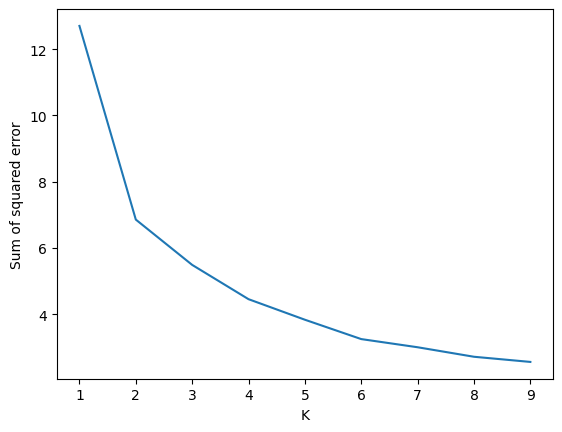

In [6]:
# Plot to obtain elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [8]:
# create clusters using k value = 4
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [9]:
# Determining mean cluster characterisitics
y_hc = hc.fit_predict(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
df['cluster'] = y_hc
df.sort_values("cluster", inplace = True, ascending=True)

#average input vars by cluster
df_cluster = df.groupby('cluster').mean()

C:\Users\daven\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: ylabel='cluster'>

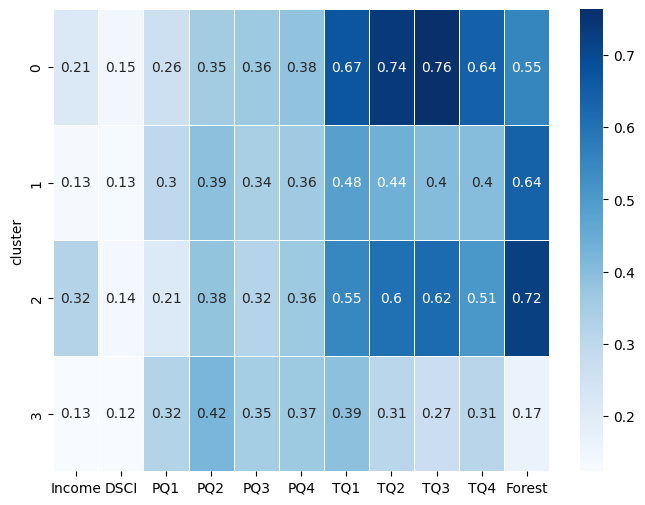

In [9]:
#Heatmap of cluster characteristics
plt.figure(figsize=(8,6))
sns.heatmap(df_cluster, annot=True, cmap="Blues", linewidths=.5)

In [10]:
# see how clusters are distributed
df['cluster'].value_counts()

0    40
2    23
1    22
3     5
Name: cluster, dtype: int64

In [11]:
# Look at counties in smallest cluster
df[df['cluster'] == 3]

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest,cluster
County,,,,,,,,,,,,
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268,3
51107,0.176528,0.129553,0.262200,0.422371,0.304163,0.345719,0.243119,0.193782,0.158764,0.189310,0.359856,3
51131,0.099351,0.117189,0.439573,0.415893,0.389930,0.397124,0.467713,0.404628,0.346264,0.386092,0.098323,3
51115,0.131867,0.118457,0.362594,0.415861,0.354178,0.358072,0.411094,0.293565,0.254598,0.315172,0.224077,3
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338,3


In [12]:
#To obtain the entire cluster labels
print(hc.labels_)

[3 2 2 0 2 1 3 0 2 2 1 1 2 2 1 2 0 0 0 0 1 1 2 1 2 0 0 0 0 0 2 2 0 1 0 2 0
 0 0 0 1 0 1 1 0 1 0 0 2 0 3 2 1 1 3 1 0 0 2 0 3 1 1 0 0 2 0 2 2 0 0 2 0 2
 1 0 2 1 1 2 0 0 0 0 0 1 0 0 1 0]


# Categorizing the clusters as suitability levels

In [13]:
# Need to research into what factors lead to land being more suitable for forestation
# Then assign levels based on the averages of each cluster from above

# Maybe redo if we can get more data and redo clusters


# Supervised ML for suitability prediction (Random Forest)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
# Reading data
# df = pd.read_csv("Labelled Normalised DACCS data.csv")

In [16]:
# creating input identity
sub_df = df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]
X = sub_df
y = df.cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [17]:
# creating Model (with 100 trees)
rf = RandomForestClassifier(n_estimators=100)

In [18]:
# Fitting training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# see which counties are in test
y_test.index

Int64Index([51085, 51157, 51171, 51091, 51131, 51075, 51185, 51041, 51113,
            51053, 51133, 51037, 51017, 51139, 51059, 51173, 51119, 51077,
            51001, 51065, 51097, 51165, 51145, 51036, 51033, 51035, 51117,
            51167],
           dtype='int64', name='County')

In [20]:
# y prediction for set of data
y_pred = rf.predict(X_test)
print(y_pred)

[1 2 1 1 1 2 1 1 1 0 1 0 0 0 2 2 0 0 3 2 1 0 1 0 0 0 1 2]


In [21]:
# To get model performance
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.82      1.00      0.90         9
           2       0.83      0.71      0.77         7
           3       1.00      0.50      0.67         2

    accuracy                           0.86        28
   macro avg       0.89      0.78      0.81        28
weighted avg       0.86      0.86      0.85        28



In [22]:
# Determining feature importance (Model Interpretation)
feature_imp = pd.DataFrame(rf.feature_importances_,index= X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
print(feature_imp)

        importance
TQ2       0.167837
TQ3       0.166542
Forest    0.162660
TQ4       0.137307
TQ1       0.083138
Income    0.079973
PQ2       0.059589
PQ1       0.050600
PQ3       0.045463
PQ4       0.025014
DSCI      0.021877


<Axes: >

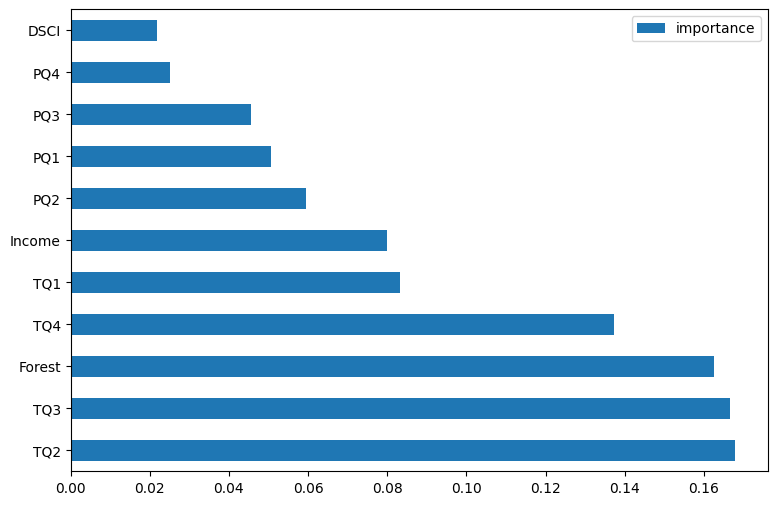

In [23]:
#Feature importance visualisation
feature_imp.plot(kind='barh')

# Supervised ML for suitability prediction (Neural Net)

In [10]:
# loading everything that might be helpful
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
import torch
from torch.utils.data import DataLoader, random_split
from torch import Generator
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch import manual_seed as torch_manual_seed
import random
import numpy as np

from torch.cuda import max_memory_allocated, set_device, manual_seed_all
from torch.backends import cudnn

def setup_seed(seed):
    torch_manual_seed(seed)
    manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    cudnn.deterministic = True

SEED = 42
setup_seed(SEED)

In [25]:
TEST_RATIO = 0.2
BATCH_SIZE = 32

size_all = len(df)
print(f'Before splitting the full dataset into train, validation, and test: len(dataset_all)={size_all}')

# training/val/test dataset
size_train = size_all - 6
size_val = int(size_train * TEST_RATIO)
size_train_sub = size_train - size_val

# split data into train and test
# Test = 6 counties of interst: Accomack, Fauquier, Greensville, Hanover, Rockingham, Wise
dataset_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]

# Train = all except 6 counties of interest
dataset_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])


# split training data into train and validation
dataset_train, dataset_val = random_split(dataset_train, [size_train_sub, size_val], generator=Generator().manual_seed(SEED))
print(f'After splitting the full dataset into train, validation, and test: len(dataset_train)={len(dataset_train)}, len(dataset_val)={len(dataset_val)}, len(dataset_test)=6')

# NOTE that you must not use the test dataset for model selection


Before splitting the full dataset into train, validation, and test: len(dataset_all)=90
After splitting the full dataset into train, validation, and test: len(dataset_train)=68, len(dataset_val)=16, len(dataset_test)=6


In [11]:
# made dataframes into dataloader objects
dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)

dataloader_val = DataLoader(dataset_val, batch_size=BATCH_SIZE, shuffle=False)

dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=False)

NameError: name 'dataset_train' is not defined

In [12]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [13]:
X_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])
X_train_full = X_train[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]

y_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])
y_train_full = y_train['cluster']

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2, random_state=49)

In [14]:
#training data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

In [15]:
#testing data
X_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]
X_test = X_test[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]
y_test = y_test['cluster']
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [16]:
#val data
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [31]:
#train data
training_data = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(training_data, batch_size=32)

#test data
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_data, batch_size=32)

#validate data
val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_data, batch_size=32)

In [27]:
# ResNet CNN

In [18]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn

model2 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Modify the last fully connected layer to have 18 output classes
num_ftrs = model2.fc.in_features
model2.fc = nn.Linear(num_ftrs, 4)

In [25]:
#Hyperparameters
from torch import device

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [26]:
# Training model

def train_loop_original(dataloader, model, loss_fn, optimizer, calculating_accuracy=True):
    model.train()
    size = len(dataloader.dataset)
    losses_train = []
    steps = []

    if calculating_accuracy:
        accuracies_epoch = []
    for batch, (X, y) in enumerate(dataloader):
        # Move data from the CPU to the GPU
        X = X.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        # Compute prediction and loss (forward pass)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation (backward pass)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        current = batch * len(X)

        #loss = loss(pred, batch.y.float())
        loss = loss.item()
        if batch % 50 == 0:
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        losses_train.append(loss)
        steps.append(current)
        # Compute accuracy without affecting the gradients

        if calculating_accuracy:
            with torch.no_grad():
                accuracy_batch = (pred.argmax(1) == y).type(torch.float).sum().item()/len(y) ## CHECK
            accuracies_epoch.append(accuracy_batch)
    if not calculating_accuracy:
        return losses_train, [], steps
    return losses_train, accuracies_epoch, steps

train_loop = train_loop_original

In [27]:
# Validating and testing model

import torch

@torch.no_grad()
def test_loop_original(dataloader, model, loss_fn, method="Test", calculating_accuracy=True):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    if calculating_accuracy:
        correct = 0

    for X, y in dataloader:
        X = X.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        if calculating_accuracy:
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    if not calculating_accuracy:
        print(f"{method} Avg loss: {test_loss:>8f} \n")
        return -1, test_loss
    correct /= size
    print(f"{method} Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

test_loop = test_loop_original

In [29]:
# Training function!

import torch
from torch import nn

learning_rate = 0.05
NUM_EPOCHS = 10

def train(model, num_epochs, loss_function, optimizer, dataloader_train, dataloader_val, calculating_accuracy=True):
    losses_train_all_epochs = []
    accuracies_train_all_epochs = []
    steps_all_epochs = []
    accuracies_val_all_epochs = []
    losses_val_all_epochs = []

    for t in range(num_epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        losses_train, accuracies_epoch, steps = train_loop(dataloader_train, model, loss_function, optimizer, calculating_accuracy=calculating_accuracy)
        losses_train_all_epochs.append(losses_train)
        accuracies_train_all_epochs.append(accuracies_epoch)
        steps_all_epochs.append(steps)

        accuracy_val, loss_val = test_loop(dataloader_val, model, loss_function, method="Valid", calculating_accuracy=calculating_accuracy)
        accuracies_val_all_epochs.append(accuracy_val)
        losses_val_all_epochs.append(loss_val)
    print("Done!")
    return accuracies_train_all_epochs, accuracies_val_all_epochs, losses_train_all_epochs, losses_val_all_epochs

In [30]:
#loss_function = nn.BCEWithLogitsLoss()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)
accuracies_train_all_epochs, accuracies_val_all_epochs, losses_train_all_epochs, losses_val_all_epochs = train(model2, NUM_EPOCHS, loss_function, optimizer, train_dataloader, val_dataloader)

Epoch 1
-------------------------------


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 11]

In [ ]:
# TESTING

accuracy_test, loss_test = test_loop(dataloader_test, model2, loss_function, method="Test")

In [ ]:
# plots
plot_accuracy(accuracies_train_all_epochs, accuracies_val_all_epochs)
plot_loss(losses_train_all_epochs, losses_val_all_epochs)

accuracy_test, loss_test = test_loop(dataloader_test, model2, loss_function, method="Test")